# Plotting and data pulling scripts

In [1]:
import os
from matplotlib import pyplot
%matplotlib inline
import numpy as np
import seaborn as sns
import json 
import pickle
import bilby
import get_bilby_data as gbd

In [2]:
def H0_Calculator(data, inj_d, H0_true=68):
    ''' Given a results object, this script calculate the corresponding H0 distribtuion
        - Also returns statistical information on distance/ra/dec/H0
    
        data: a single result object returned from a gbd.get_bilby_data call
        inj_d: the injected distance of the signal 
    '''
    distance=np.array(data[0][5])
    ra=np.array(data[0][12])
    dec=np.array(data[0][11])

    print("Distance: true median:",np.median(distance),"true mean:",np.mean(distance))
    print("")
    print("Ra: true median:",np.median(ra),"true mean:",np.mean(ra))
    print("")
    print("Dec: true median:",np.median(dec),"true mean:",np.mean(dec))
    print("")

    c=299792.45
    zt=inj_d*H0_true/c
    H0=zt*c/distance
    tm=np.median(H0)
    tme=np.mean(H0)

    print("H0: true median:",tm,"true mean:",tme)
    return H0


def H0_Printer(H0_array, rgb, H0_true=68):
    ''' Given an H0 distribution and color, this scritpt plots the distribution
        with a dotted red line indicating the true H0 value
        
        H0_array: a numpy array representing an H0 distribution
        rgb: a color a plot the array with
        H0_true: the assumed value of H0 at which we plot the red dotted line
    '''
    pyplot.hist(H0_array, bins=1000, color=rgb)
    ax = pyplot.gca()
    ylim = ax.get_ylim()
    pyplot.plot([H0_true, H0_true], ylim, 'r--')
    pyplot.ylim(ylim)


# Taking in data
the result files are read in using the 'get_bilby_data' code, and then each run is saved into the 'data' array. Colors for plotting are also generated here

In [3]:
#get file identifiers
ra_dec=[file[6:].split('_') for file in os.listdir() if file[:5]=='bilby']
ra_dec=[ [float(ra_dec[i][0]),float(ra_dec[i][1])] for i in range(len(ra_dec))]
ra_dec

#create indiviudal colors for each dataset 
rgb=[(np.random.rand(), np.random.rand(), np.random.rand()) for rd in ra_dec]


#get full result.json data for each run, and place it in 'data' array
data=[]
for run in ra_dec:
    path='bilby_{}_{}/bilby_{}_{}_result.json'.format(run[0],run[1],run[0],run[1])
    result=gbd.get_bilby_data(path)
    data.append(result)


In [16]:
# showing ra_dec contents
print(ra_dec)
print("")
print(rgb)

[[3.0, -1.2], [3.0, -1.5], [3.2, -1.0], [2.8, -0.8], [2.6, -0.6], [3.4, -1.4], [2.7, -0.7], [3.3, -1.3]]

[(0.23430434369707986, 0.5857495405226038, 0.4149363595809892), (0.0466800206531478, 0.809111135903553, 0.25259758675790045), (0.4504395249892178, 0.9381887413285681, 0.6164528335395744), (0.48477847524171946, 0.15966393819827818, 0.8145246021418355), (0.9372029558004521, 0.018548227061971456, 0.3959943562592234), (0.02386527459377319, 0.8071097424742647, 0.7910722307479152), (0.3714043426491135, 0.6411664707265127, 0.12821371927515723), (0.4316671830330606, 0.4049339787066889, 0.23631843248765383)]


# Plotting Data:
The following does some basic indiviudal/grouped/total distance plots, and indiviudal/grouped/total H0 plots

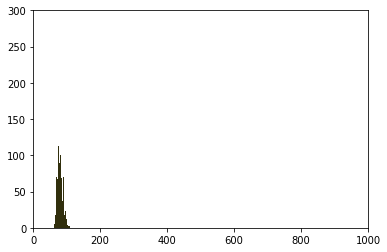

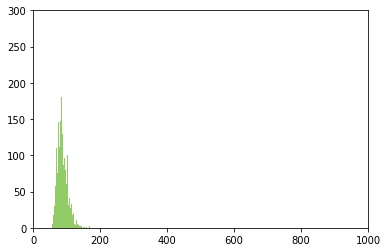

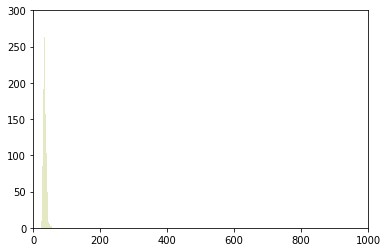

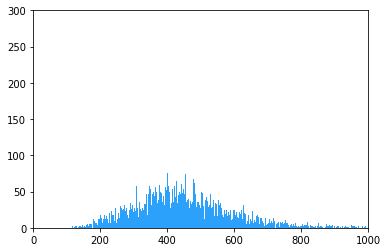

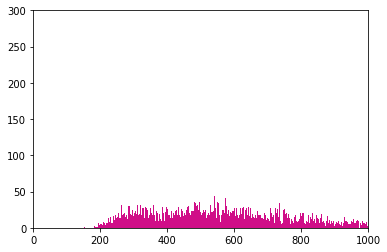

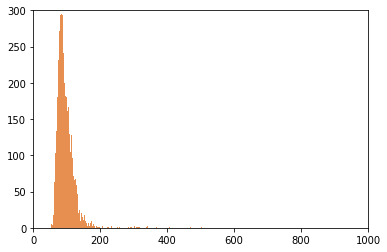

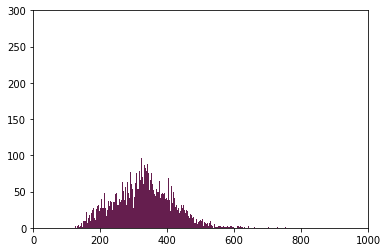

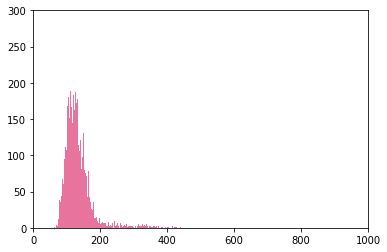

In [7]:
#plot indiviudal distance histograms seperatly 

#initializing index to call appropriate colors
i=0

#plotting/ formatting 
for run in data:
    pyplot.hist(np.array(run[0][5]),bins=1000, color=rgb[i]);
    pyplot.axis([0,1000,0,300])
    pyplot.show()
    i+=1

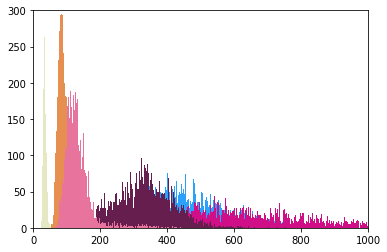

In [8]:
#Plot all distance distributions on the same figure

#initializing index to call appropriate colors
i=0

#plotting/ formatting 
for run in data:
    pyplot.hist(np.array(run[0][5]),bins=1000, color=rgb[i]);
    pyplot.axis([0,1000,0,300])
    i+=1

Distance: true median: 92.64813776007648 true mean: 178.45398911504066



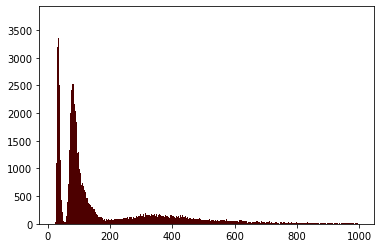

In [9]:
#plots total distance distribution across all runs

#total will append all run data into one histogram 
total=[]
for run in data:
    total=np.append(total, run[0][5])
    
#calculate statistics
print("Distance: true median:",np.median(total),"true mean:",np.mean(total))
print("")

pyplot.hist(total, bins=1000, color=(0.3,0,0));
pyplot.show()


Distance: true median: 79.9349444672245 true mean: 80.72831518965143

Ra: true median: 3.0 true mean: 3.0

Dec: true median: -1.2 true mean: -1.1999999999999997

H0: true median: 63.801883318892386 true mean: 63.90693635364931


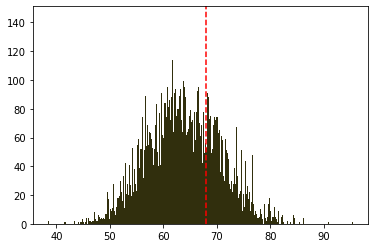

Distance: true median: 84.97639633616666 true mean: 87.20985159891143

Ra: true median: 3.0 true mean: 3.0

Dec: true median: -1.5 true mean: -1.5

H0: true median: 60.01666603775945 true mean: 60.14881376992639


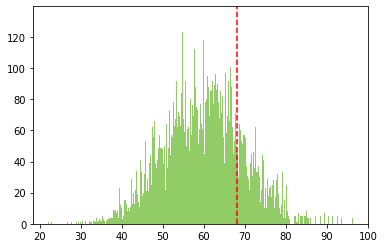

Distance: true median: 34.07049785343295 true mean: 34.69459330851431

Ra: true median: 3.2 true mean: 3.2

Dec: true median: -1.0 true mean: -1.0

H0: true median: 149.68962361335508 true mean: 149.37954940397486


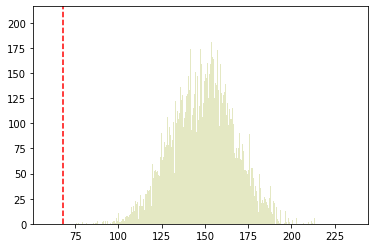

Distance: true median: 435.6641531581886 true mean: 451.2847824338404

Ra: true median: 2.8 true mean: 2.7999999999999994

Dec: true median: -0.8 true mean: -0.8000000000000002

H0: true median: 11.70626493903924 true mean: 12.678140819412524


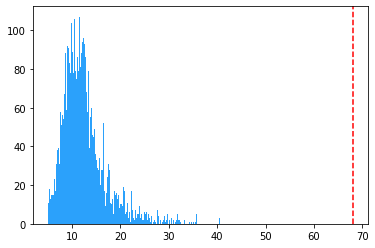

Distance: true median: 539.9841841554651 true mean: 550.7453571216455

Ra: true median: 3.3 true mean: 3.299999999999999

Dec: true median: -1.3 true mean: -1.3000000000000003

H0: true median: 9.444721347058165 true mean: 10.773349948400133


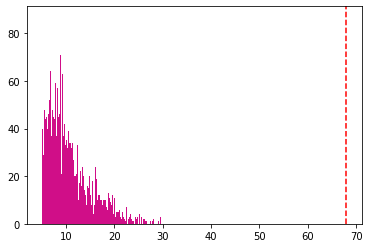

Distance: true median: 90.66018099003082 true mean: 95.67997818715716

Ra: true median: 3.4 true mean: 3.399999999999999

Dec: true median: -1.4 true mean: -1.3999999999999997

H0: true median: 56.25402403024991 true mean: 56.21401677107589


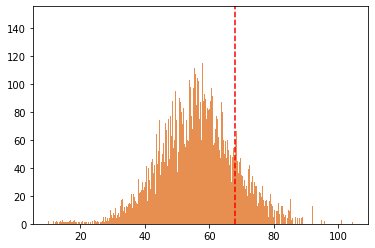

Distance: true median: 330.9473219317229 true mean: 331.0844072887503

Ra: true median: 2.7 true mean: 2.7

Dec: true median: -0.7 true mean: -0.7

H0: true median: 15.410307508251028 true mean: 16.62126603992413


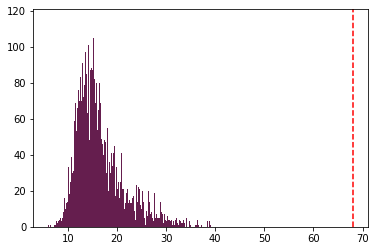

Distance: true median: 125.42733247004709 true mean: 134.59312157368024

Ra: true median: 3.3 true mean: 3.299999999999999

Dec: true median: -1.3 true mean: -1.3000000000000003

H0: true median: 40.66099389634962 true mean: 40.867976052926075


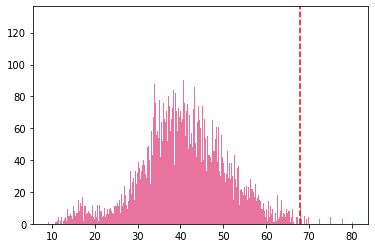

In [10]:
#plots indivudal H0 distributions on sepearte figure

#initializing index to call appropriate colors
i=0

#plotting/ formatting 
for run in data:
    total=np.append(total, run[0][5])
    run_H=H0_Calculator(run, 75)
    H0_Printer(run_H, rgb[i])
    pyplot.show()
    i+=1

Distance: true median: 79.9349444672245 true mean: 80.72831518965143

Ra: true median: 3.0 true mean: 3.0

Dec: true median: -1.2 true mean: -1.1999999999999997

H0: true median: 63.801883318892386 true mean: 63.90693635364931
Distance: true median: 84.97639633616666 true mean: 87.20985159891143

Ra: true median: 3.0 true mean: 3.0

Dec: true median: -1.5 true mean: -1.5

H0: true median: 60.01666603775945 true mean: 60.14881376992639
Distance: true median: 34.07049785343295 true mean: 34.69459330851431

Ra: true median: 3.2 true mean: 3.2

Dec: true median: -1.0 true mean: -1.0

H0: true median: 149.68962361335508 true mean: 149.37954940397486
Distance: true median: 435.6641531581886 true mean: 451.2847824338404

Ra: true median: 2.8 true mean: 2.7999999999999994

Dec: true median: -0.8 true mean: -0.8000000000000002

H0: true median: 11.70626493903924 true mean: 12.678140819412524
Distance: true median: 539.9841841554651 true mean: 550.7453571216455

Ra: true median: 3.3 true mean: 3

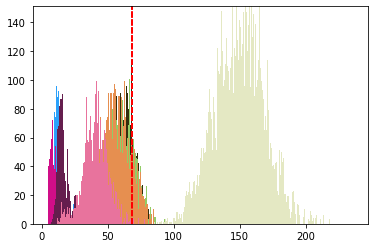

In [13]:
#plots all H0 distributions on the same figure

#initializing index to call appropriate colors
i=0

#plotting/ formatting 
for run in data:
    total=np.append(total, run[0][5])
    run_H=H0_Calculator(run, 75);
    H0_Printer(run_H, rgb[i]);
    i+=1


H0: true median: 55.04697798899169 true mean: 62.58364001419257


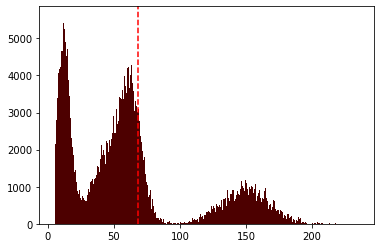

In [14]:
#plots total H0 distribution across all runs

#inital calculations
c=299792.45
zt=75*68/c
total_H0=zt*c/total
tm=np.median(total_H0)
tme=np.mean(total_H0)

print("H0: true median:",tm,"true mean:",tme)

H0_Printer(total_H0, (0.3, 0, 0))

# Calculate Standard Deviations

In [10]:
for run in data:
    run_H=H0_Calculator(run, 75);
    print(np.std(run_H))
    


6.793424108765563

9.82138719310015

18.530409006439708

4.748640948326539

4.537663782930195

11.683678741417562

4.96488735953168

9.955443759474342


# Scripts for Meta-Data/ Prior Descriptions

In [ ]:
#reading in an object
values=bilby.result.read_in_result('bilby_3.0_-1.2/bilby_3.0_-1.2_result.json')

#KDE?
values.kde.dataset?

#prior descriptions
values.priors

#meta data
values.meta_data['likelihood']['interferometers']['H1']['parameters']

# Dat-file 

In [3]:
def H0_dat_Calculator(data, inj_d, H0_true=68):
    ''' Given a results object, this script calculate the corresponding H0 distribtuion
        - Also returns statistical information on distance/ra/dec/H0
    
        data: a single result object returned from a gbd.get_bilby_data call
        inj_d: the injected distance of the signal 
    '''
    distance=data

    print("Distance: true median:",np.median(distance),"true mean:",np.mean(distance))

    c=299792.45
    zt=inj_d*H0_true/c
    H0=zt*c/distance
    tm=np.median(H0)
    tme=np.mean(H0)

    print("H0: true median:",tm,"true mean:",tme)
    return H0

In [11]:
#get file identifiers
ra_dec=[file[6:].split('_') for file in os.listdir() if file[:5]=='bilby']
ra_dec=[ [float(ra_dec[i][0]),float(ra_dec[i][1])] for i in range(len(ra_dec))]
ra_dec

#create indiviudal colors for each dataset 
rgb=[(np.random.rand(), np.random.rand(), np.random.rand()) for rd in ra_dec]


#get full result.json data for each run, and place it in 'data' array
data=[]
for run in ra_dec:
    path='bilby_{}_{}/bilby_{}_{}_samples.dat'.format(run[0],run[1],run[0],run[1])
    result= np.recfromtxt(path, names=True)
    lum_dist = result['luminosity_distance']
    data.append(lum_dist)


In [ ]:
#plot indiviudal distance histograms seperatly 

#initializing index to call appropriate colors
i=0

#plotting/ formatting 
for run in data:
    pyplot.hist(run,bins=1000, color=rgb[i]);
    pyplot.show()
    i+=1

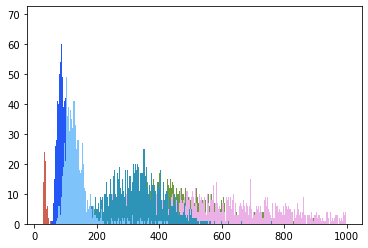

In [58]:
#Plot all distance distributions on the same figure

#initializing index to call appropriate colors
i=0

#plotting/ formatting 
for run in data:
    pyplot.hist(run,bins=1000, color=rgb[i]);
    i+=1

Distance: true median: 106.61675467400198 true mean: 211.48238371940909



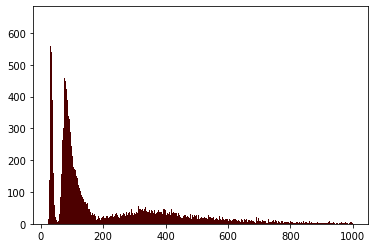

In [59]:
#plots total distance distribution across all runs

#total will append all run data into one histogram 
total=[]
for run in data:
    total=np.append(total, run)
    
#calculate statistics
print("Distance: true median:",np.median(total),"true mean:",np.mean(total))
print("")

pyplot.hist(total, bins=1000, color=(0.3,0,0));
pyplot.show()


sky position: ra: 3.0 dec: -1.2
Distance: true median: 79.89085890431409 true mean: 80.67477389809997
H0: true median: 63.83709062520295 true mean: 63.93990436980803
H0 standard deviation: 6.764149839323586
 


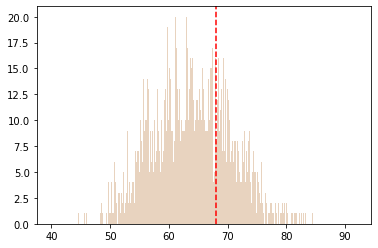

sky position: ra: 3.0 dec: -1.5
Distance: true median: 85.0189526818591 true mean: 87.34820669185132
H0: true median: 59.986624618680004 true mean: 60.11067660818212
H0 standard deviation: 9.95513301083703
 


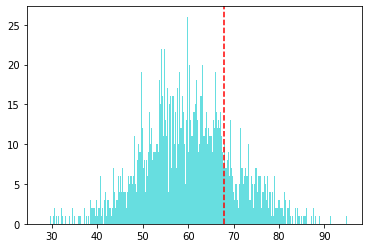

sky position: ra: 3.2 dec: -1.0
Distance: true median: 34.06462100722185 true mean: 34.71031055150021
H0: true median: 149.71544814541681 true mean: 149.27158109580583
H0 standard deviation: 18.321666958555877
 


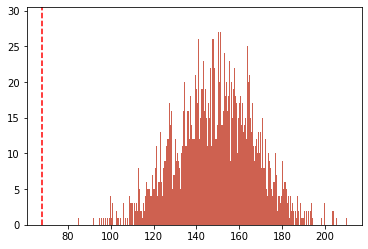

sky position: ra: 2.8 dec: -0.8
Distance: true median: 435.5973911138816 true mean: 451.28982817763557
H0: true median: 11.708059102371132 true mean: 12.651877640476679
H0 standard deviation: 4.6458837600063685
 


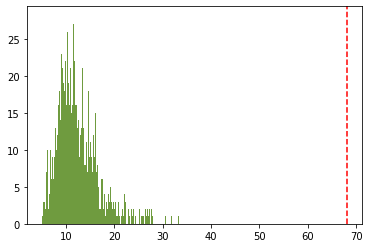

sky position: ra: 2.6 dec: -0.6
Distance: true median: 539.5602603998831 true mean: 551.0073128860216
H0: true median: 9.45214163144678 true mean: 10.770644427186763
H0 standard deviation: 4.54758410948261
 


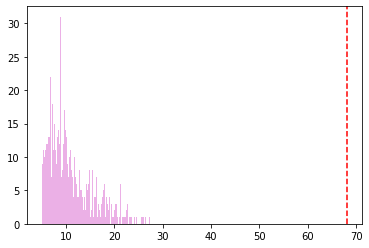

sky position: ra: 3.4 dec: -1.4
Distance: true median: 90.65739277959644 true mean: 95.56493059576613
H0: true median: 56.2557541497154 true mean: 56.24343228819083
H0 standard deviation: 11.662984517033859
 


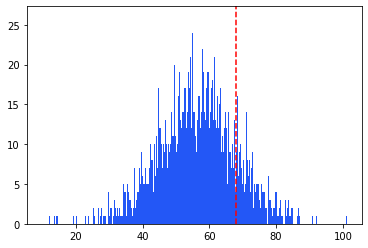

sky position: ra: 2.7 dec: -0.7
Distance: true median: 331.18695710180504 true mean: 331.94016969231683
H0: true median: 15.399157157871926 true mean: 16.584913489314253
H0 standard deviation: 4.97417462311464
 


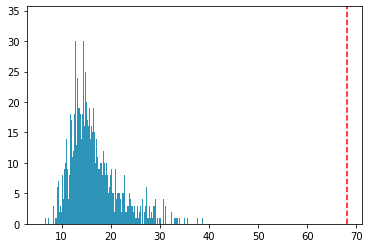

sky position: ra: 3.3 dec: -1.3
Distance: true median: 125.56154236023916 true mean: 134.96879701329937
H0: true median: 40.61753228044917 true mean: 40.775698722145954
H0 standard deviation: 9.93299007576865
 


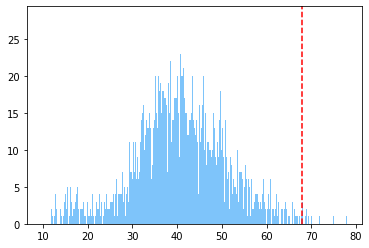

In [92]:
#plots indivudal H0 distributions on sepearte figure

#initializing index to call appropriate colors
i=0

total=[]

#plotting/ formatting 
for run in data:
    co_ord="ra: "+str(ra_dec[i][0])+" dec: "+str(ra_dec[i][1])
    print("sky position: "+co_ord)
    total=np.append(total, run)
    run_H=H0_dat_Calculator(run, 75)
    print("H0 standard deviation"+": "+str(np.std(run_H)))
    print(" ")
    H0_Printer(run_H, rgb[i])
    pyplot.show()
    i+=1

Distance: true median: 79.89085890431409 true mean: 80.67477389809997
H0: true median: 63.83709062520295 true mean: 63.93990436980803
Distance: true median: 85.0189526818591 true mean: 87.34820669185132
H0: true median: 59.986624618680004 true mean: 60.11067660818212
Distance: true median: 34.06462100722185 true mean: 34.71031055150021
H0: true median: 149.71544814541681 true mean: 149.27158109580583
Distance: true median: 435.5973911138816 true mean: 451.28982817763557
H0: true median: 11.708059102371132 true mean: 12.651877640476679
Distance: true median: 539.5602603998831 true mean: 551.0073128860216
H0: true median: 9.45214163144678 true mean: 10.770644427186763
Distance: true median: 90.65739277959644 true mean: 95.56493059576613
H0: true median: 56.2557541497154 true mean: 56.24343228819083
Distance: true median: 331.18695710180504 true mean: 331.94016969231683
H0: true median: 15.399157157871926 true mean: 16.584913489314253
Distance: true median: 125.56154236023916 true mean: 1

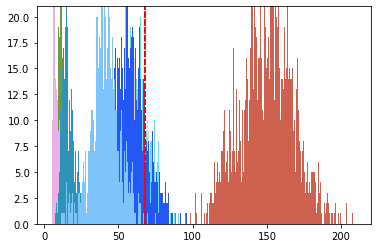

In [94]:
#Plot all H0 distributions on the same figure

total=[]

#initializing index to call appropriate colors
i=0

#plotting/ formatting 
for run in data:
    total=np.append(total, run)
    run_H=H0_dat_Calculator(run, 75)
    H0_Printer(run_H, rgb[i])
    i+=1

H0: true median: 47.834883229248994 true mean: 54.89829792446568
H0 standard deviation: 46.362967237979824


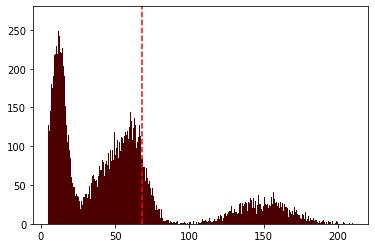

In [95]:
#plots total H0 distribution across all runs

#inital calculations
c=299792.45
zt=75*68/c
total_H0=zt*c/total
tm=np.median(total_H0)
tme=np.mean(total_H0)

print("H0: true median:",tm,"true mean:",tme)
print("H0 standard deviation"+": "+str(np.std(total_H0)))

H0_Printer(total_H0, (0.3, 0, 0))

In [85]:
i=0
for run in data:
    co_ord="ra: "+str(ra_dec[i][0])+" dec: "+str(ra_dec[i][1])
    print("sky position: "+co_ord)
    run_H=H0_dat_Calculator(run, 75);
    print("standard deviation"+": "+str(np.std(run_H)))
    print(" ")
    i+=1

sky position: ra: 3.0 dec: -1.2
Distance: true median: 79.89085890431409 true mean: 80.67477389809997
H0: true median: 63.83709062520295 true mean: 63.93990436980803
standard deviation: 6.764149839323586
 
sky position: ra: 3.0 dec: -1.5
Distance: true median: 85.0189526818591 true mean: 87.34820669185132
H0: true median: 59.986624618680004 true mean: 60.11067660818212
standard deviation: 9.95513301083703
 
sky position: ra: 3.2 dec: -1.0
Distance: true median: 34.06462100722185 true mean: 34.71031055150021
H0: true median: 149.71544814541681 true mean: 149.27158109580583
standard deviation: 18.321666958555877
 
sky position: ra: 2.8 dec: -0.8
Distance: true median: 435.5973911138816 true mean: 451.28982817763557
H0: true median: 11.708059102371132 true mean: 12.651877640476679
standard deviation: 4.6458837600063685
 
sky position: ra: 2.6 dec: -0.6
Distance: true median: 539.5602603998831 true mean: 551.0073128860216
H0: true median: 9.45214163144678 true mean: 10.770644427186763
stan

9